# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
#LOADING DATA

# loading data
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/ionosphere/ionosphere_data.csv')


In [5]:
dataset.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [7]:
dataset.shape

(351, 35)

In [8]:
# missing values
dataset.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

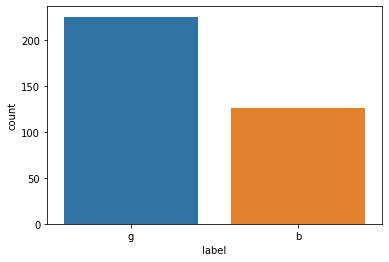

In [9]:
# checking how much data has class imbalance
sns.countplot(x='label', data=dataset)

In [10]:
# count values of the classes
dataset['label'].value_counts()

g    225
b    126
Name: label, dtype: int64

In [11]:
# check variance
dataset.var()

feature1     0.096817
feature2     0.000000
feature3     0.247713
feature4     0.194865
feature5     0.270256
feature6     0.212346
feature7     0.242708
feature8     0.271180
feature9     0.257115
feature10    0.234112
feature11    0.317528
feature12    0.244844
feature13    0.387116
feature14    0.244899
feature15    0.426184
feature16    0.210104
feature17    0.381949
feature18    0.246772
feature19    0.392210
feature20    0.269440
feature21    0.371891
feature22    0.268496
feature23    0.364535
feature24    0.278210
feature25    0.334605
feature26    0.258567
feature27    0.266467
feature28    0.302528
feature29    0.331644
feature30    0.258038
feature31    0.326593
feature32    0.263759
feature33    0.273177
feature34    0.219340
dtype: float64

In [12]:
# 'feature2' has  no variance (no impact on the output), therefore it won't be useful for the model
dataset.drop(columns=['feature2'], inplace=True)

In [13]:
# converting 'feature1' from int64 to float64
dataset['feature1'] = dataset.feature1.astype('float64')

In [14]:
dataset.dtypes

feature1     float64
feature3     float64
feature4     float64
feature5     float64
feature6     float64
feature7     float64
feature8     float64
feature9     float64
feature10    float64
feature11    float64
feature12    float64
feature13    float64
feature14    float64
feature15    float64
feature16    float64
feature17    float64
feature18    float64
feature19    float64
feature20    float64
feature21    float64
feature22    float64
feature23    float64
feature24    float64
feature25    float64
feature26    float64
feature27    float64
feature28    float64
feature29    float64
feature30    float64
feature31    float64
feature32    float64
feature33    float64
feature34    float64
label         object
dtype: object

In [15]:
# shuffling data
dataset = dataset.sample(frac=1)

In [16]:
# splitting data into input (X) and output (y)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [17]:
# standardization is needed if the values of input features are not in the range [-1,1]
X.min(), X.max()

(-1.0, 1.0)

In [19]:
# splitting data into 60% train set and 40% test set
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.40, random_state=0)

In [20]:
# encoding the labels
from sklearn.preprocessing import LabelEncoder

# create encoder
encoder = LabelEncoder()

# train labels
encoder.fit(train_labels)
train_labels = encoder.transform(train_labels)

# test labels
encoder.fit(test_labels)
test_labels = encoder.transform(test_labels)

In [21]:
#  model definition
def baseline_model():
  model = Sequential([
      Dense(16, activation='relu', input_shape=(train_data.shape[-1],)),
      Dense(1, activation='sigmoid')
  ])


  # compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [22]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                544       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [23]:
# fit the model for training
history = model.fit(train_data, train_labels, epochs=100, batch_size=128, verbose=0)

In [24]:
# store history in dataframe
hist = pd.DataFrame(history.history)
hist.tail()

,loss,accuracy
95,0.342238,0.876190
96,0.339706,0.885714
97,0.337458,0.885714
98,0.335048,0.885714
99,0.332645,0.885714


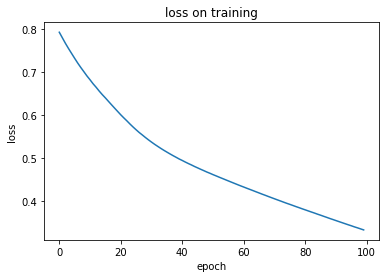

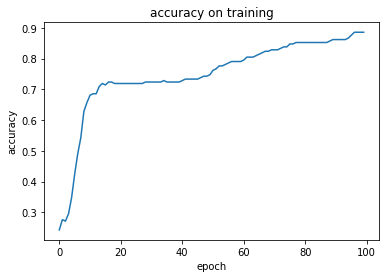

In [25]:
# loss
plt.plot(hist['loss'])
plt.title('loss on training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# accuracy
plt.plot(hist['accuracy'])
plt.title('accuracy on training')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [26]:
# evaluation on test set
_, acc = model.evaluate(test_data, test_labels, verbose=0)
acc_pct = acc*100
print('Model accuracy: {:,.2f}{}'.format(acc_pct, "%"))

Model accuracy: 78.01%


In [27]:
# second model definition
def model2():
  model = Sequential([
      Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(train_data.shape[-1],)),
      Dense(8, activation='relu', kernel_initializer='he_normal'),
      Dense(1, activation='sigmoid')
  ])


  # compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [28]:
model = model2()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                340       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 437
Trainable params: 437
Non-trainable params: 0
_________________________________________________________________


In [29]:
# train model
history = model.fit(train_data, train_labels, epochs=50, verbose=0, batch_size=8)

In [30]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,accuracy
45,0.070345,0.990476
46,0.066588,0.990476
47,0.064670,0.985714
48,0.062348,0.990476
49,0.060012,0.990476


In [35]:
# evaluation on test set
_, acc = model.evaluate(test_data, test_labels, verbose=0)
acc_pct = acc*100
print('Model accuracy: {:,.2f}{}'.format(acc_pct, "%"))

Model accuracy: 87.23%


In [32]:
# making predictions
predictions=model.predict(test_data)

In [33]:
# making comparision of first 10 predictions with test labels
print('Predictions:\n{}\nTruth: {}'.format(predictions[:10], test_labels[:10]))

Predictions:
[[0.9992583 ]
 [0.02269071]
 [0.0525485 ]
 [0.8242674 ]
 [0.8729298 ]
 [0.99759656]
 [0.987929  ]
 [0.9948553 ]
 [0.9975953 ]
 [0.9965596 ]]
Truth: [1 0 0 0 1 1 1 1 1 1]


In [34]:
# save model and architecture to single file
model.save('ionosphere_model.h5')
print('model saved')

model saved
